

·       Applying all the classification
algorithms like LR, NB,SVM,KNN,DT,RF,Adaboost.


·       Evaluating the performance using
classification metrics.

Comparing the performance of
the entire classification algorithm.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# To ignore Warning
import warnings

warnings.filterwarnings('ignore')

In [ ]:
#Reading the dataset
df=pd.read_csv('adult.csv')

In [ ]:
# Getting the top 5 Records
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
# Getting the bottom 5 Records
df.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [ ]:
# Getting more information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
# Getting the list of columns
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [ ]:
# Getting the Statistical Information about the dataset
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


Data Cleaning

In [ ]:
# Checking for Null Values
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [ ]:
# Checking for Duplicate Values
df[df.duplicated()]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
864,24,Private,194630,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
11189,37,Private,52870,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
11212,29,Private,36440,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
13848,30,Private,180317,Assoc-voc,11,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,<=50K
15960,18,Self-emp-inc,378036,12th,8,Never-married,Farming-fishing,Own-child,White,Male,0,0,10,United-States,<=50K
18476,39,Private,184659,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,<=50K
19399,19,Private,130431,5th-6th,3,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,36,Mexico,<=50K
19726,41,Private,116391,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
20606,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
21162,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K


In [ ]:
# Remove Duplicate Values
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
df.shape

(48790, 15)

In [ ]:
# Import label encoder
from sklearn import preprocessing

In [ ]:
label_encoder = preprocessing.LabelEncoder()

In [ ]:
# Conversion in seperate statement
df['workclass']= label_encoder.fit_transform(df['workclass'])
df['education']= label_encoder.fit_transform(df['education'])
df['marital-status']= label_encoder.fit_transform(df['marital-status'])
df['relationship']= label_encoder.fit_transform(df['relationship'])
df['occupation']= label_encoder.fit_transform(df['occupation'])
df['race']= label_encoder.fit_transform(df['race'])
df['gender']= label_encoder.fit_transform(df['gender'])
df['native-country']= label_encoder.fit_transform(df['native-country'])
df['income']= label_encoder.fit_transform(df['income'])

df.head()



,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,39,0
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,39,0
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,39,1
3,44,4,160323,15,10,2,7,0,2,1,7688,0,40,39,1
4,18,0,103497,15,10,4,0,3,4,0,0,0,30,39,0


In [ ]:
df.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48785,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
48786,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
48787,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
48788,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0
48789,52,5,287927,11,9,2,4,5,4,0,15024,0,40,39,1


In [ ]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,39,0
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,39,0
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,39,1
3,44,4,160323,15,10,2,7,0,2,1,7688,0,40,39,1
4,18,0,103497,15,10,4,0,3,4,0,0,0,30,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48785,27,4,257302,7,12,2,13,5,4,0,0,0,38,39,0
48786,40,4,154374,11,9,2,7,0,4,1,0,0,40,39,1
48787,58,4,151910,11,9,6,1,4,4,0,0,0,40,39,0
48788,22,4,201490,11,9,4,1,3,4,1,0,0,20,39,0


### Outlier
Outlier is an observation in a given dataset that lies far from the rest of the observations. An outlier may occur due to the variability in the data, or due to experimental error/human error.



<Axes: >

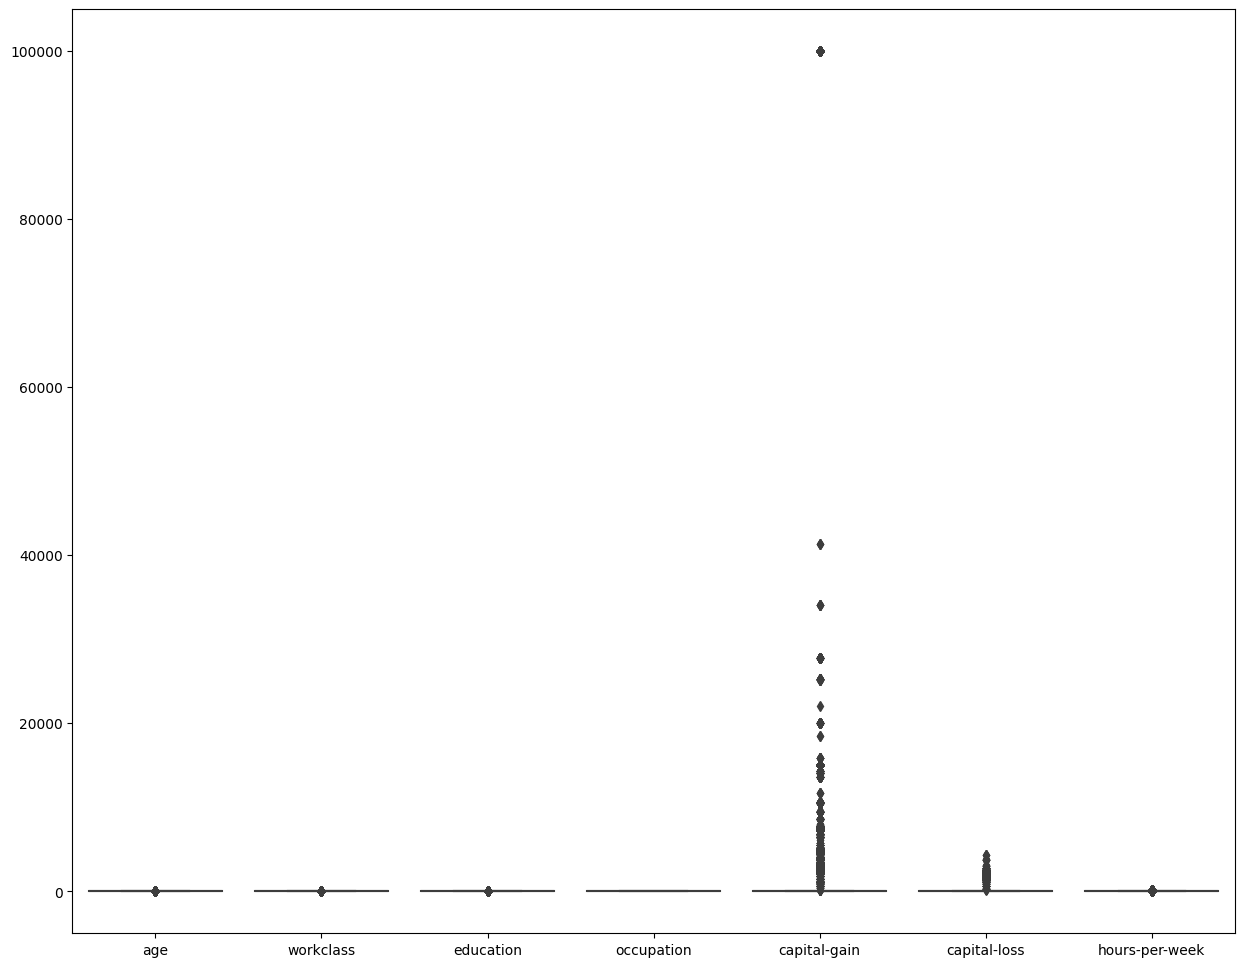

In [ ]:
# Checking for the presence of outliers in numeric cols ('age','workclass','education','occupation','capital-gain','capital-loss','hours-per-week')

plt.figure(figsize=(15,12)) # Set the Width & Height
sns.boxplot(data=df[['age','workclass','education','occupation','capital-gain','capital-loss','hours-per-week',]])

In [ ]:

def detect_outliers_iqr(data):
    outlier_list = []
    data = sorted(data)

    q1 = np.percentile(data, 20)
    q3 = np.percentile(data, 80)

    #print("The Val of Q1 and Q2",q1, q3)
    IQR = q3-q1

    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)

    #print("The lower & Upper Bound",lwr_bound, upr_bound)

    for i in data:
        if (i<lwr_bound or i>upr_bound):
            outlier_list.append(i)
    return outlier_list



for i in ['age','workclass','education','occupation','capital-gain','capital-loss','hours-per-week']:
    outliers = detect_outliers_iqr(df[i])
    print("Outliers in",i,"attribute :", outliers)

Outliers in age attribute : [89, 89, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90]
Outliers in workclass attribute : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

No Outlier in Education, Occupation

In [ ]:
# Handling outliers using Quantile based flooring and capping method.
#the outlier is capped at a certain value above the 90th percentile value or floored at a factor below the 10th percentile value
# Computing 10th, 90th percentiles and replacing the outliers

def handle_outliers(data):

    tenth_percentile = np.percentile(data, 20)
    ninetieth_percentile = np.percentile(data, 80)

    b = np.where(data<tenth_percentile, tenth_percentile, data)

    b1 = np.where(b>ninetieth_percentile, ninetieth_percentile, b)
    return b1


for i in ['age','workclass','education','occupation','capital-gain','capital-loss','hours-per-week']:
    df[i]=handle_outliers(df[i])



<Axes: >

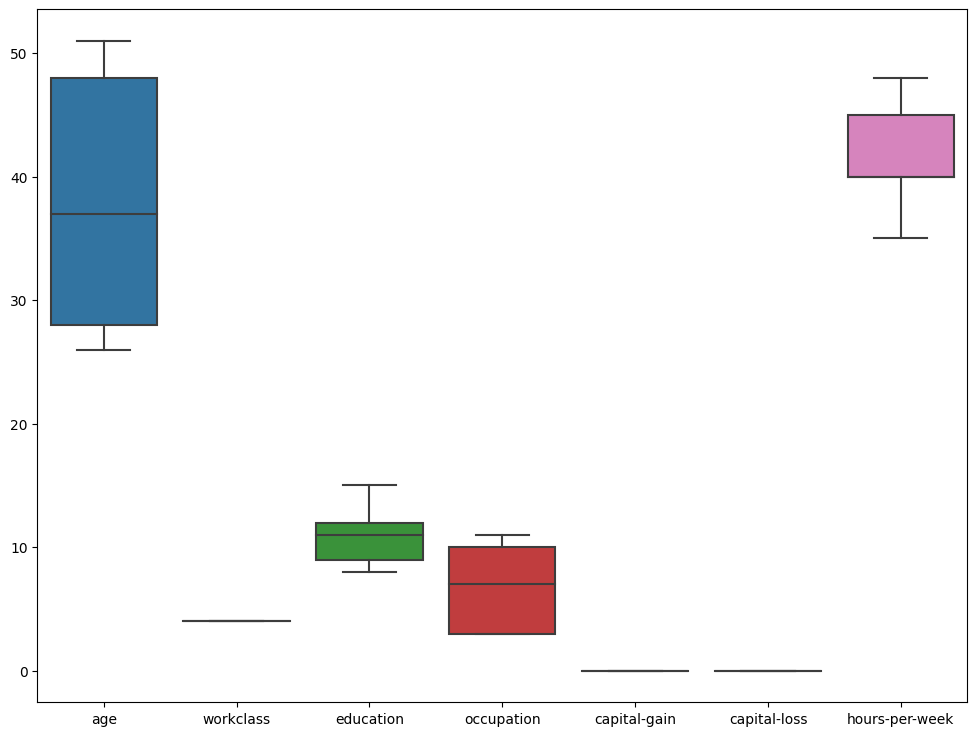

In [ ]:
# verifying again with boxplot

plt.figure(figsize=(12,9))
sns.boxplot(data=df[['age','workclass','education','occupation','capital-gain','capital-loss','hours-per-week']])

### Univariate analysis

out of 48790 24 % people have salary greater than 50K


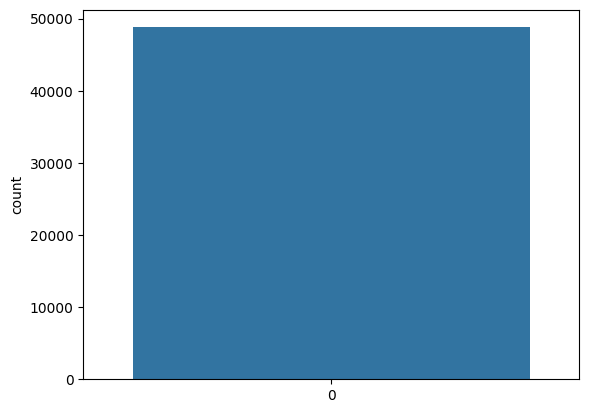

In [ ]:
# Output Column
#countplot is used to displays the count of observations for each category

sns.countplot(df['income'])

salary= round (df['income'].value_counts().values[1]/48790*100)

# Observation
print('out of 48790 {} % people have salary greater than 50K'.format(salary))

out of 48790 67 % patients are male


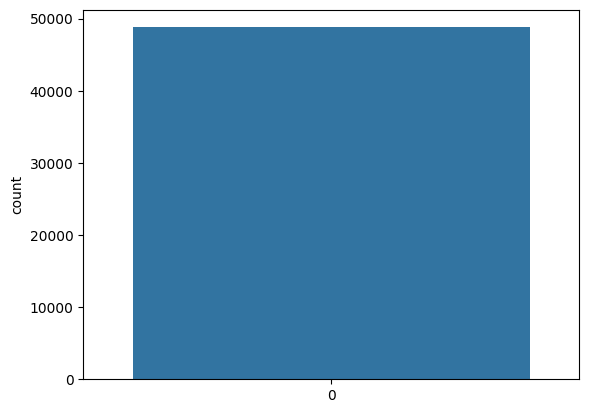

In [ ]:
# GenderColumn
sns.countplot(df['gender'])

gender = round (df['gender'].value_counts().values[0]/48790*100)

# Observation
print('out of 48790 {} % patients are male'.format(gender))

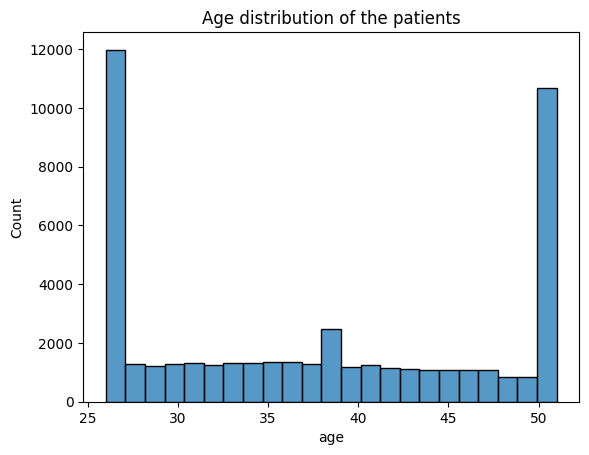

In [ ]:
# A histogram is a graph showing frequency distributions.
# It is a graph showing the number of observations within each given interval.

#Age
sns.histplot(df.age)
plt.title('Age distribution of the patients')
plt.savefig('age.png')
plt.show()

<Axes: xlabel='age', ylabel='education'>

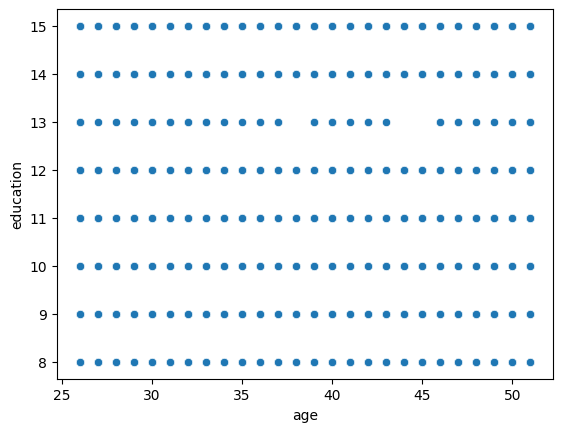

In [ ]:
#Create Scatterplot
# It is used to obtain the correlational relationship between two numerical variables.
sns.scatterplot(x='age',y='education',data=df)

Text(0.5, 1.0, 'Correlation map')

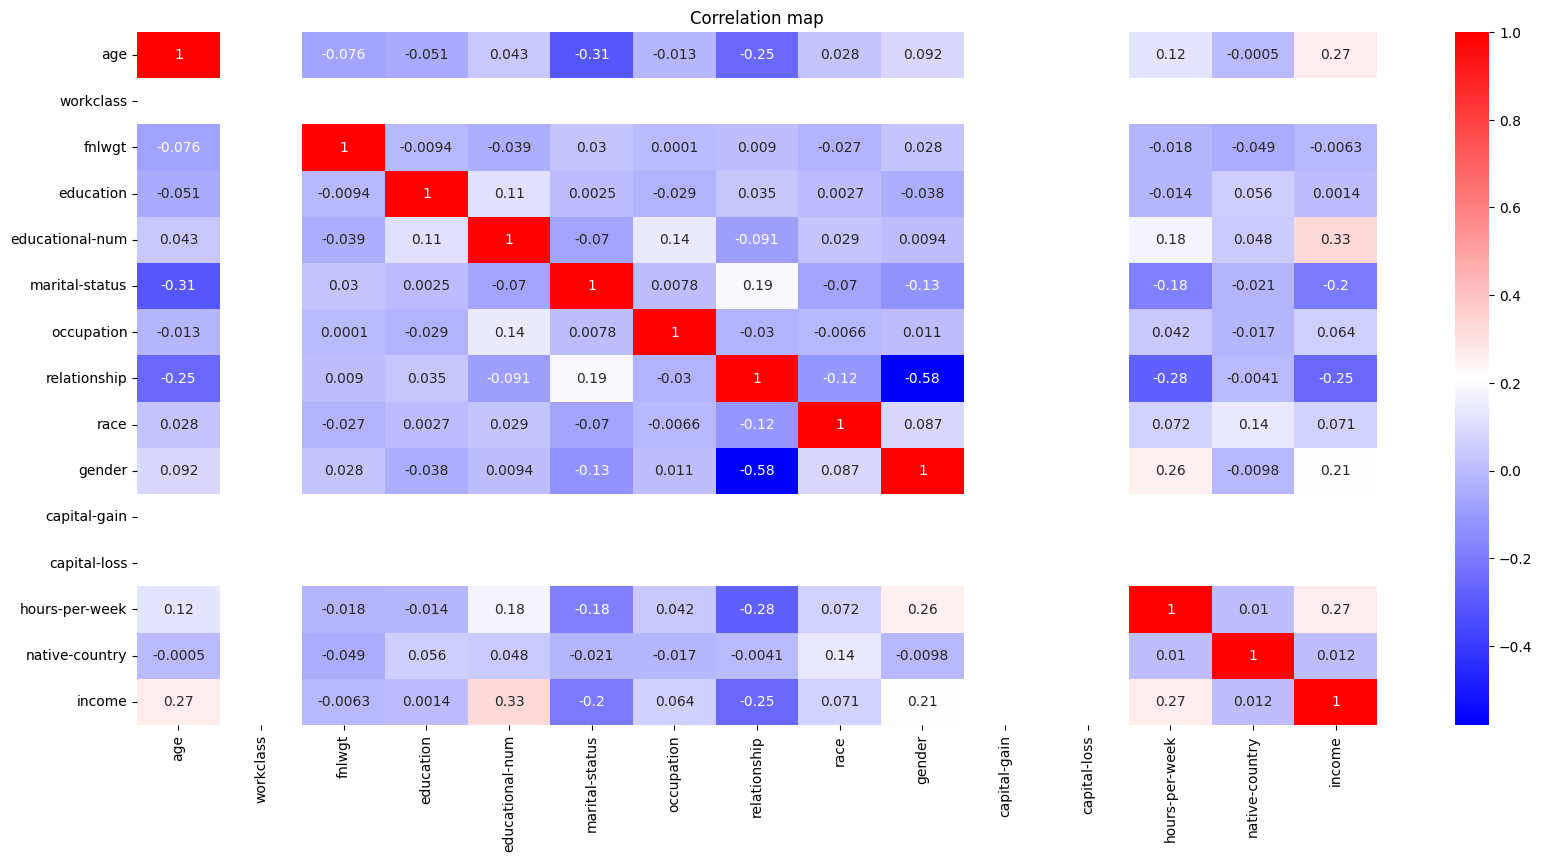

In [ ]:
# Heatmap is use to display correlation between different variable
plt.figure(figsize=(20,9));
sns.heatmap(df.corr(),annot=True,cmap='bwr');
plt.title("Correlation map")

From the above correlation we can say that feature 'Age', 'Gender''Educational-num' and 'Hours-per-week'are highly correlated to Income (target variable).

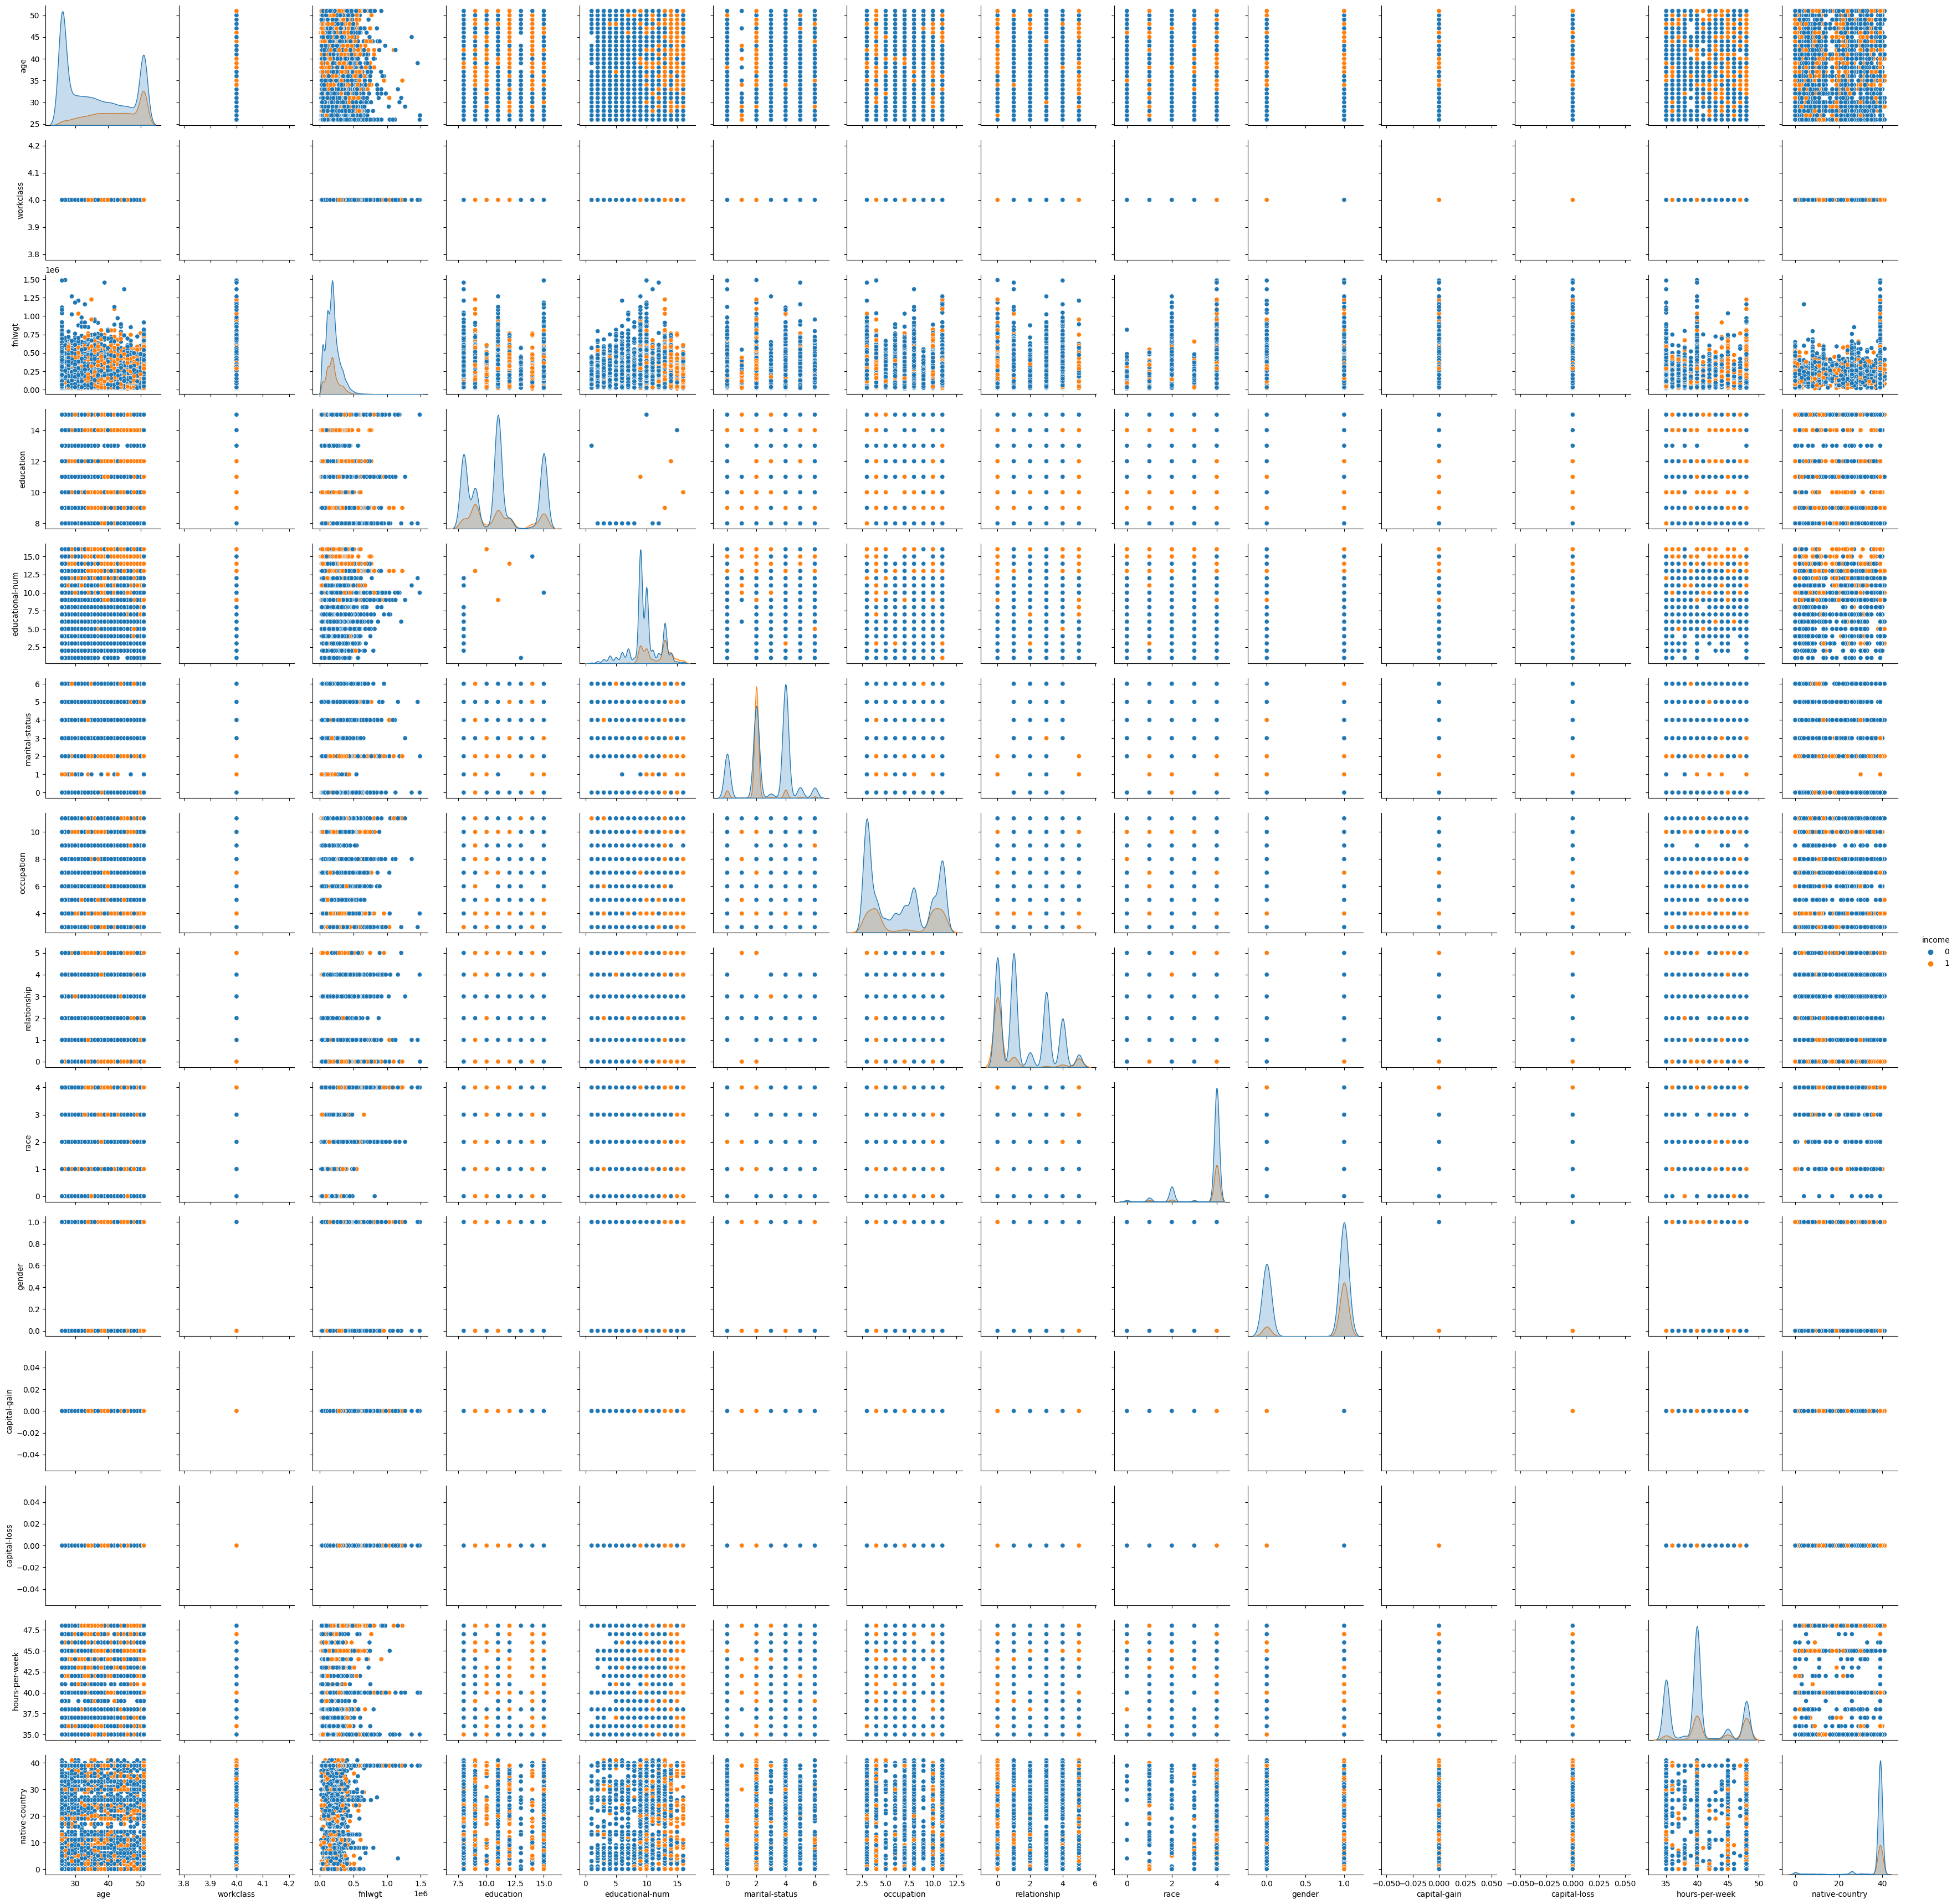

In [ ]:
# It is use to plot pairwise relationships between variables within a dataset.
# it is applicable to numeric columns only.

sns.pairplot(df[['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country','income']],hue='income')   #name of dependent variable

### Feature Scaling

In [ ]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,26.0,4.0,226802,8.0,7,4,7.0,3,2,1,0.0,0.0,40.0,39,0
1,38.0,4.0,89814,11.0,9,2,5.0,0,4,1,0.0,0.0,48.0,39,0
2,28.0,4.0,336951,8.0,12,2,11.0,0,4,1,0.0,0.0,40.0,39,1
3,44.0,4.0,160323,15.0,10,2,7.0,0,2,1,0.0,0.0,40.0,39,1
4,26.0,4.0,103497,15.0,10,4,3.0,3,4,0,0.0,0.0,35.0,39,0


In [ ]:
from sklearn.preprocessing import StandardScaler  # Standarization

scale = StandardScaler()

df[['age','workclass','education','occupation','capital-gain','capital-loss','hours-per-week']]=scale.fit_transform(df[['age','workclass','education','occupation','capital-gain','capital-loss','hours-per-week']])

In [ ]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,-1.237599,0.0,226802,-1.214752,7,4,0.103231,3,2,1,0.0,0.0,-0.211632,39,0
1,0.016233,0.0,89814,-0.018109,9,2,-0.512005,0,4,1,0.0,0.0,1.573013,39,0
2,-1.028627,0.0,336951,-1.214752,12,2,1.333701,0,4,1,0.0,0.0,-0.211632,39,1
3,0.643149,0.0,160323,1.577416,10,2,0.103231,0,2,1,0.0,0.0,-0.211632,39,1
4,-1.237599,0.0,103497,1.577416,10,4,-1.127240,3,4,0,0.0,0.0,-1.327034,39,0


### Data Preparation

In [ ]:
from sklearn.model_selection import train_test_split # Import train_test_split function

In [ ]:
#split dataset in features and target variable

feature_cols = ['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']
X = df[feature_cols] # Features
y = df.income # Target variable

In [ ]:
y

0        0
1        0
2        1
3        1
4        0
        ..
48785    0
48786    1
48787    0
48788    0
48789    1
Name: income, Length: 48790, dtype: int64

In [ ]:
# Split dataset into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 20% test

In [ ]:
X_train.shape

(39032, 14)

In [ ]:
 X_test.shape

(9758, 14)

Here splitting the dataset into train set and test set with the size of 80% and 20%

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [ ]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred = logreg.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_test

39342    0
14418    0
39075    0
24877    0
35461    0
        ..
22974    0
37980    0
7092     0
21284    1
38152    0
Name: income, Length: 9758, dtype: int64

In [ ]:
from sklearn import metrics

In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.7581471613035458

In [ ]:
metrics.confusion_matrix(y_test, y_pred)

array([[7398,    0],
       [2360,    0]])

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86      7398
           1       0.00      0.00      0.00      2360

    accuracy                           0.76      9758
   macro avg       0.38      0.50      0.43      9758
weighted avg       0.57      0.76      0.65      9758



# Naive Bayes


In [ ]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = gnb.predict(X_test)

y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7581


In [ ]:
y_pred_train = gnb.predict(X_train)

y_pred_train

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.7612


In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.7612
Test set score: 0.7581


# SVM

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[7398    0]
 [2360    0]]


0.7581471613035458

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn5 = KNeighborsClassifier(n_neighbors = 5)
knn1 = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn5.fit(X_train, y_train)
knn1.fit(X_train, y_train)

y_pred_5 = knn5.predict(X_test)
y_pred_1 = knn1.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy with k=5", accuracy_score(y_test, y_pred_5)*100)
print("Accuracy with k=1", accuracy_score(y_test, y_pred_1)*100)

Accuracy with k=5 73.39618774339004
Accuracy with k=1 70.83418733346998


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7757737241237959


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8132814101250256


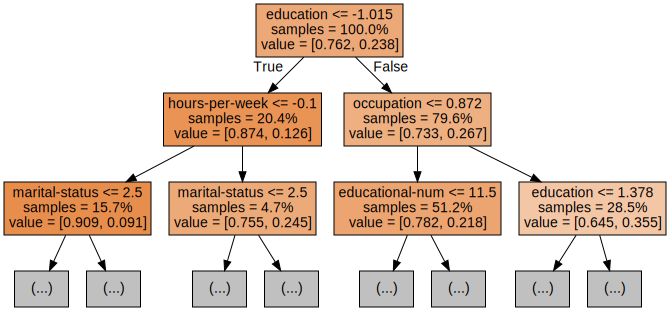

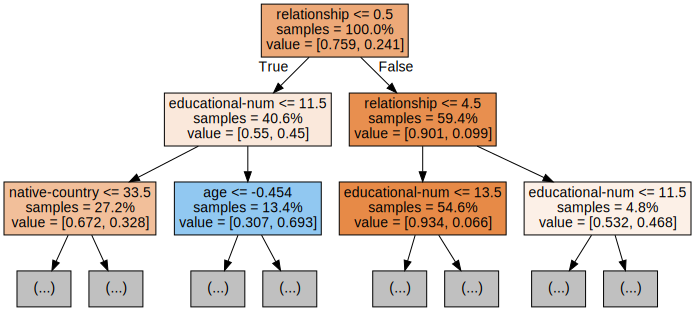

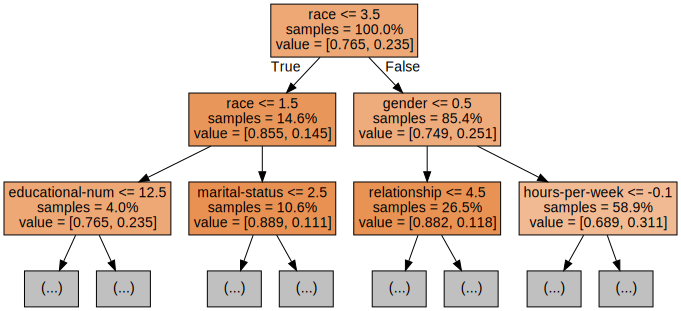

In [ ]:
# Visualising Results,Export the first three decision trees from the forest
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
for i in range(3):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e5e54f64490>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e5e54a371f0>})

In [ ]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 8, 'n_estimators': 319}


# Adaboost

In [ ]:
# Create adaboost classifer object
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)


In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.8344947735191638


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [ ]:
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Support Vector Machine": SVC(),
    "k-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier()
}

In [ ]:
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

In [ ]:
print("Classification Algorithm Performance:")
for name, accuracy in results.items():
    print(f"{name}: Accuracy = {accuracy:.4f}")

Classification Algorithm Performance:
Logistic Regression: Accuracy = 0.7581
Naive Bayes: Accuracy = 0.7581
Support Vector Machine: Accuracy = 0.7581
k-Nearest Neighbors: Accuracy = 0.7340
Decision Tree: Accuracy = 0.7780
Random Forest: Accuracy = 0.8142
AdaBoost: Accuracy = 0.8345


Hence Adaboost works best on the dataset giving accuracy of 83.45%